Mean Squared Error: 9.700452462368826
R-squared: 0.531745688363827
Model saved as chess_frequency_predictor_advanced.pkl


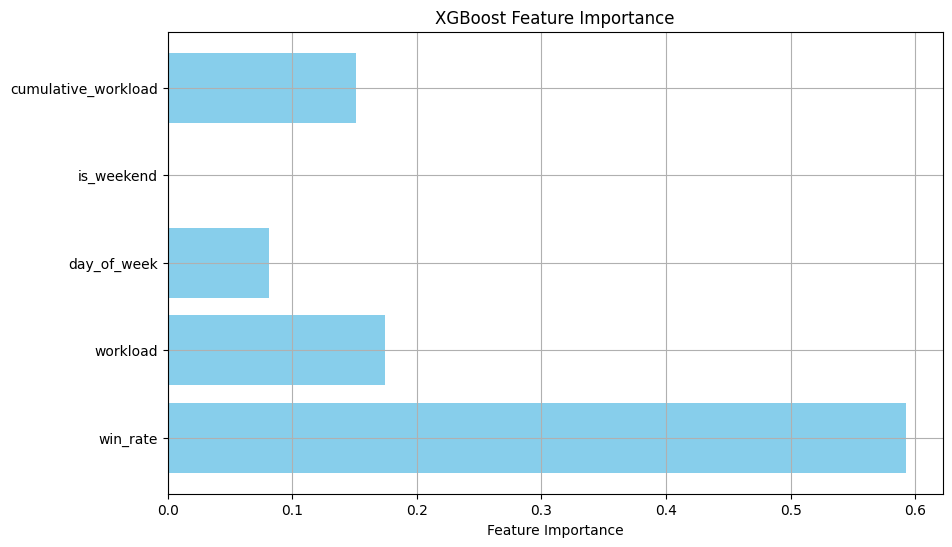

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib


# Load datasets
chess_url = 'C:\\Users\\kosot\\OneDrive\\Masaüstü\\CS210-HW2\\Project\\DSA210_Term_Project_bugrahan.yapilmisev\\Data_Extraction\\filtered_chess_games_modified_png.csv'
academic_url = 'C:\\Users\\kosot\\OneDrive\\Masaüstü\\CS210-HW2\\Project\\DSA210_Term_Project_bugrahan.yapilmisev\\Data_Extraction\\exam_and_assignment_dates.csv'


# Load the data
chess_data = pd.read_csv(chess_url)
academic_data = pd.read_csv(academic_url)

# Preprocess chess data
chess_data['end_time'] = pd.to_datetime(chess_data['end_time'])
chess_data['date'] = chess_data['end_time'].dt.date
chess_data['win'] = chess_data['result_standardized'].apply(lambda x: 1 if x == 'win' else 0)

# Aggregate chess data by day
daily_chess = chess_data.groupby('date').agg(
    chess_count=('url', 'size'),
    win_rate=('win', 'mean')
).reset_index()

# Preprocess academic data
academic_data['date'] = pd.to_datetime(academic_data['date'], format='%d/%m/%Y').dt.date

# Extend workload over the previous 10 days (including the current day)
extended_workload = []
for _, row in academic_data.iterrows():
    for offset in range(0, 11):
        extended_workload.append({'date': row['date'] - pd.Timedelta(days=offset), 'workload': 1})

extended_workload = pd.DataFrame(extended_workload)
daily_workload = extended_workload.groupby('date').sum().reset_index()

# Merge datasets
merged_data = pd.merge(daily_chess, daily_workload, on='date', how='outer').fillna(0)

# Feature Engineering
merged_data['day_of_week'] = pd.to_datetime(merged_data['date']).dt.dayofweek  # 0 = Monday, 6 = Sunday
merged_data['is_weekend'] = merged_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekends
merged_data['cumulative_workload'] = merged_data['workload'].rolling(window=10, min_periods=1).sum()

# Filter for Fall and Spring terms
merged_data['date'] = pd.to_datetime(merged_data['date'])
fall_and_spring = merged_data[
    ((merged_data['date'].dt.month >= 9) & (merged_data['date'].dt.month <= 12)) |  # Fall months
    ((merged_data['date'].dt.month >= 1) & (merged_data['date'].dt.month <= 5))    # Spring months
]

# Features and target
X = fall_and_spring.drop(columns=['chess_count', 'date'])  # Drop target and non-numeric columns
y = fall_and_spring['chess_count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Save the trained model
joblib.dump(model, "chess_frequency_predictor_advanced_xgboost.pkl")
print("Model saved as chess_frequency_predictor_advanced_xgboost.pkl")

# Feature Importance
feature_importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.show()


c:\Anaconda\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_22                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_23                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0255 - mae: 0.1116 - val_loss: 0.0342 - val_mae: 0.1314
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0177 - mae: 0.0938 - val_loss: 0.0307 - val_mae: 0.1290
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0155 - mae: 0.0948 - val_loss: 0.0308 - val_mae: 0.1266
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0144 - mae: 0.0860 - val_loss: 0.0304 - val_mae: 0.1245
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134 - mae: 0.0837 - val_loss: 0.0286 - val_mae: 0.1247
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0151 - mae: 0.0933 - val_loss: 0.0293 - val_mae: 0.1235
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0126 - mae: 0.0843 - val_loss: 0.0285 - val_mae: 0.1256
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0141 - mae: 0.0877 - val_loss: 0.0286 - val_mae: 0.1230
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

Test Loss: 0.028099773451685905
Test MAE: 0.12156582623720169
Model saved as chess_frequency_bilstm_model.h5


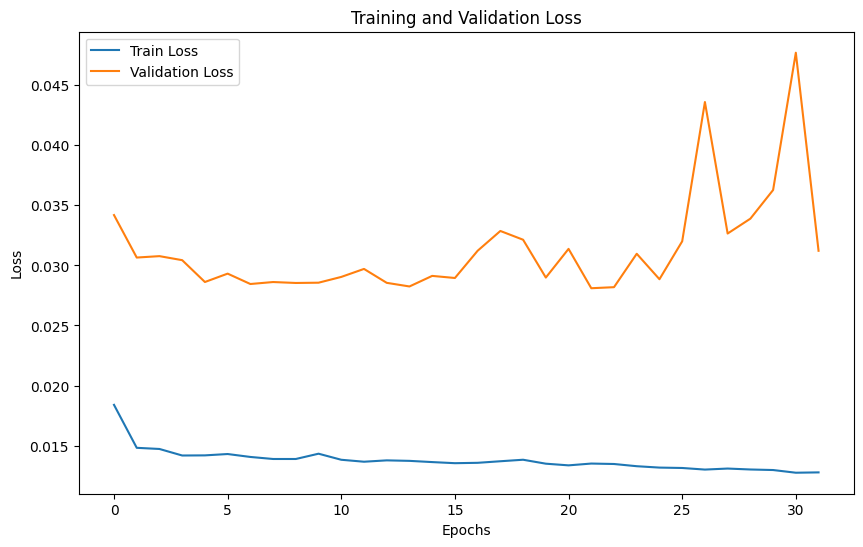

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


<module 'matplotlib.pyplot' from 'c:\\Anaconda\\anaconda3\\envs\\tensorflow_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM
from keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

# Load and preprocess data
chess_url = 'C:\\Users\\kosot\\OneDrive\\Masaüstü\\CS210-HW2\\Project\\DSA210_Term_Project_bugrahan.yapilmisev\\Data_Extraction\\filtered_chess_games_modified_png.csv'
academic_url = 'C:\\Users\\kosot\\OneDrive\\Masaüstü\\CS210-HW2\\Project\\DSA210_Term_Project_bugrahan.yapilmisev\\Data_Extraction\\exam_and_assignment_dates.csv'

chess_data = pd.read_csv(chess_url)
academic_data = pd.read_csv(academic_url)

# Preprocess chess data
chess_data['end_time'] = pd.to_datetime(chess_data['end_time'])
chess_data['date'] = chess_data['end_time'].dt.date
chess_data['win'] = chess_data['result_standardized'].apply(lambda x: 1 if x == 'win' else 0)

# Aggregate chess data by day
daily_chess = chess_data.groupby('date').agg(
    chess_count=('url', 'size'),
    win_rate=('win', 'mean')
).reset_index()

# Preprocess academic data
academic_data['date'] = pd.to_datetime(academic_data['date'], format='%d/%m/%Y').dt.date

# Extend workload over the previous 10 days (including the current day)
extended_workload = []
for _, row in academic_data.iterrows():
    for offset in range(0, 11):  # Include current day and 10 previous days
        extended_workload.append({'date': row['date'] - pd.Timedelta(days=offset), 'workload': 1})

extended_workload = pd.DataFrame(extended_workload)
daily_workload = extended_workload.groupby('date').sum().reset_index()

# Merge datasets
merged_data = pd.merge(daily_chess, daily_workload, on='date', how='outer').fillna(0)

# Sort by date
merged_data = merged_data.sort_values(by='date')

# Features and target
features = ['workload', 'win_rate']
target = 'chess_count'

# Fill missing values
merged_data[features] = merged_data[features].fillna(0)

# Normalize data
scaler = MinMaxScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])
merged_data[target] = scaler.fit_transform(merged_data[[target]])

# Split into sequences for time series
sequence_length = 10

def create_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, target_col])
    return np.array(X), np.array(y)

# Prepare data for BiLSTM
data = merged_data[features + [target]].values
X, y = create_sequences(data, -1, sequence_length)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Build the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(sequence_length, len(features)))),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Save the trained model
model.save("chess_frequency_bilstm_model.h5")
print("Model saved as chess_frequency_bilstm_model.h5")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)
plt


c:\Anaconda\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0226 - mae: 0.1128 - val_loss: 0.0368 - val_mae: 0.1355 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - mae: 0.0980 - val_loss: 0.0365 - val_mae: 0.1331 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0180 - mae: 0.0985 - val_loss: 0.0350 - val_mae: 0.1313 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0143 - mae: 0.0861 - val_loss: 0.0332 - val_mae: 0.1294 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0172 - mae: 0.0936 - val_loss: 0.0326 - val_mae: 0.1285 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mae: 0.0869 - val_loss: 0.0324 - val_mae: 0.1291 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0162 - mae: 0.0960 - val_loss: 0.0341 - val_mae: 0.1295 - learning_rate: 0.0010
Epoch

Test Loss: 0.0313
Test MAE: 0.1275
Model saved as chess_frequency_bilstm_model.h5


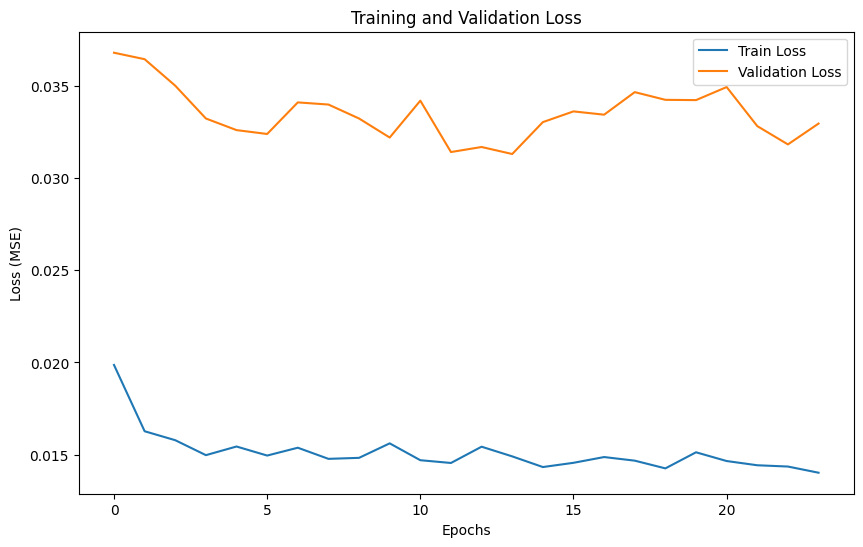

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step


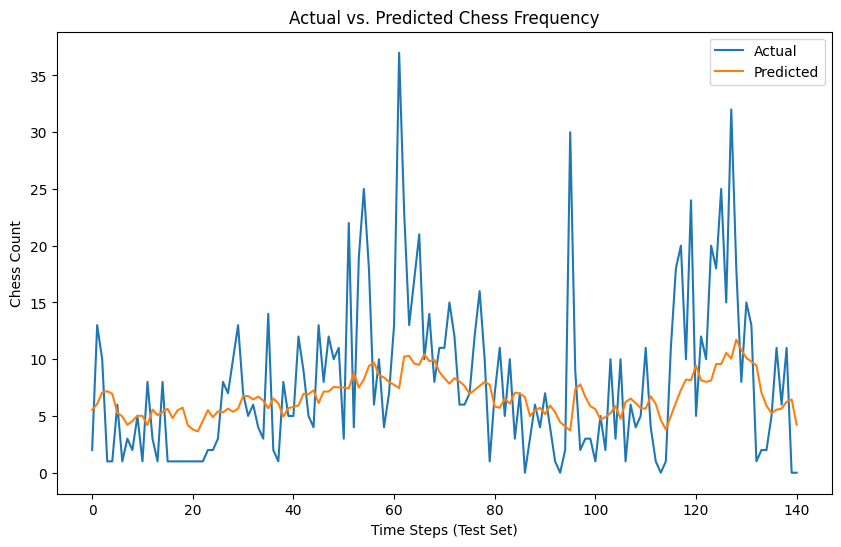

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, GRU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
import matplotlib.pyplot as plt
import datetime

# ----------------------------- #
# 1. Load and preprocess data
# ----------------------------- #
chess_url = r'C:\Users\kosot\OneDrive\Masaüstü\CS210-HW2\Project\DSA210_Term_Project_bugrahan.yapilmisev\Data_Extraction\filtered_chess_games_modified_png.csv'
academic_url = r'C:\Users\kosot\OneDrive\Masaüstü\CS210-HW2\Project\DSA210_Term_Project_bugrahan.yapilmisev\Data_Extraction\exam_and_assignment_dates.csv'

chess_data = pd.read_csv(chess_url)
academic_data = pd.read_csv(academic_url)

# Convert relevant columns to datetime
chess_data['end_time'] = pd.to_datetime(chess_data['end_time'])
chess_data['date'] = chess_data['end_time'].dt.date
chess_data['win'] = chess_data['result_standardized'].apply(lambda x: 1 if x == 'win' else 0)

# Aggregate chess data by day
daily_chess = chess_data.groupby('date').agg(
    chess_count=('url', 'size'),
    win_rate=('win', 'mean')
).reset_index()

# Convert academic data date to datetime.date
academic_data['date'] = pd.to_datetime(academic_data['date'], format='%d/%m/%Y').dt.date

# Extend workload over the previous 10 days (including the current day)
extended_workload = []
for _, row in academic_data.iterrows():
    for offset in range(0, 11):  # Include current day and 10 previous days
        extended_workload.append({'date': row['date'] - pd.Timedelta(days=offset), 'workload': 1})

extended_workload = pd.DataFrame(extended_workload)
daily_workload = extended_workload.groupby('date').sum().reset_index()

# Merge datasets
merged_data = pd.merge(daily_chess, daily_workload, on='date', how='outer').fillna(0)

# ----------------------------- #
# 2. Additional Feature Example: Day of the week
# ----------------------------- #
# Convert 'date' back to datetime so we can extract weekday
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['day_of_week'] = merged_data['date'].dt.dayofweek  # Monday=0, Sunday=6

# Sort by date
merged_data = merged_data.sort_values(by='date').reset_index(drop=True)

# ----------------------------- #
# 3. Features and Target
# ----------------------------- #
# Now we have: 
#   workload, win_rate, day_of_week
#   target: chess_count
features = ['workload', 'win_rate', 'day_of_week']
target = 'chess_count'

# Fill missing values
merged_data[features] = merged_data[features].fillna(0)

# ----------------------------- #
# 4. Scaling
# ----------------------------- #
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale features
merged_data[features] = scaler_x.fit_transform(merged_data[features])
# Scale target
merged_data[[target]] = scaler_y.fit_transform(merged_data[[target]])

# ----------------------------- #
# 5. Create sequences for LSTM/GRU
# ----------------------------- #
sequence_length = 10

def create_sequences(data_array, target_col_idx, seq_length):
    X, y = [], []
    for i in range(len(data_array) - seq_length):
        X.append(data_array[i : i + seq_length])
        y.append(data_array[i + seq_length, target_col_idx])
    return np.array(X), np.array(y)

data_array = merged_data[features + [target]].values
X, y = create_sequences(data_array, -1, sequence_length)

# ----------------------------- #
# 6. Split dataset
# ----------------------------- #
# Note: shuffle=False to preserve time order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# ----------------------------- #
# 7. Build the Model
# ----------------------------- #
# Option A: BiLSTM with dropout
"""model = Sequential([
    Bidirectional(LSTM(
        64, 
        return_sequences=True, 
        input_shape=(sequence_length, len(features)),
        dropout=0.2,            # dropout on input
        recurrent_dropout=0.2   # dropout on recurrent state
    )),
    Bidirectional(LSTM(
        32,
        dropout=0.2,            # dropout on input
        recurrent_dropout=0.2   # dropout on recurrent state
    )),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])"""

# --- Option B: BiGRU (uncomment to try) ---
model = Sequential([
     Bidirectional(GRU(
         64, 
         return_sequences=True, 
         input_shape=(sequence_length, len(features)),
         dropout=0.2, 
         recurrent_dropout=0.2
     )),
     Bidirectional(GRU(
         32,
         dropout=0.2, 
         recurrent_dropout=0.2
     )),
     Dense(16, activation='relu'),
     Dense(1)
 ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ----------------------------- #
# 8. Training with EarlyStopping & ReduceLROnPlateau
# ----------------------------- #
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # halve the learning rate
    patience=5,        # if no improvement for 5 epochs
    verbose=1,
    min_lr=1e-6
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ----------------------------- #
# 9. Evaluate the Model
# ----------------------------- #
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# ----------------------------- #
# 10. Save the Model
# ----------------------------- #
model.save("chess_frequency_bilstm_model_option_b.h5")
print("Model saved as chess_frequency_bilstm_model_option_b.h5")

# ----------------------------- #
# 11. Plot Training History
# ----------------------------- #
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# ----------------------------- #
# 12. Make & Invert Predictions for Interpretation
# ----------------------------- #
y_pred = model.predict(X_test)

# If you want to transform predictions back to original scale
y_test_inversed = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inversed = scaler_y.inverse_transform(y_pred)

# Optional: Plot predictions vs actual in original scale
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, label='Actual')
plt.plot(y_pred_inversed, label='Predicted')
plt.xlabel('Time Steps (Test Set)')
plt.ylabel('Chess Count')
plt.title('Actual vs. Predicted Chess Frequency')
plt.legend()
plt.show()


c:\Anaconda\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_24                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_25                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 0.0236 - mae: 0.1102 - val_loss: 0.0403 - val_mae: 0.1372 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0134 - mae: 0.0825 - val_loss: 0.0332 - val_mae: 0.1323 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176 - mae: 0.0956 - val_loss: 0.0323 - val_mae: 0.1293 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - mae: 0.0883 - val_loss: 0.0327 - val_mae: 0.1301 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0144 - mae: 0.0913 - val_loss: 0.0352 - val_mae: 0.1300 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0159 - mae: 0.0921 - val_loss: 0.0345 - val_mae: 0.1297 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0174 - mae: 0.0930 - val_loss: 0.0331 - val_mae: 0.1286 - learning_rate: 0.0010
Epoch

Test Loss: 0.0322
Test MAE: 0.1273
Model saved as chess_frequency_bilstm_model_option_a.h5


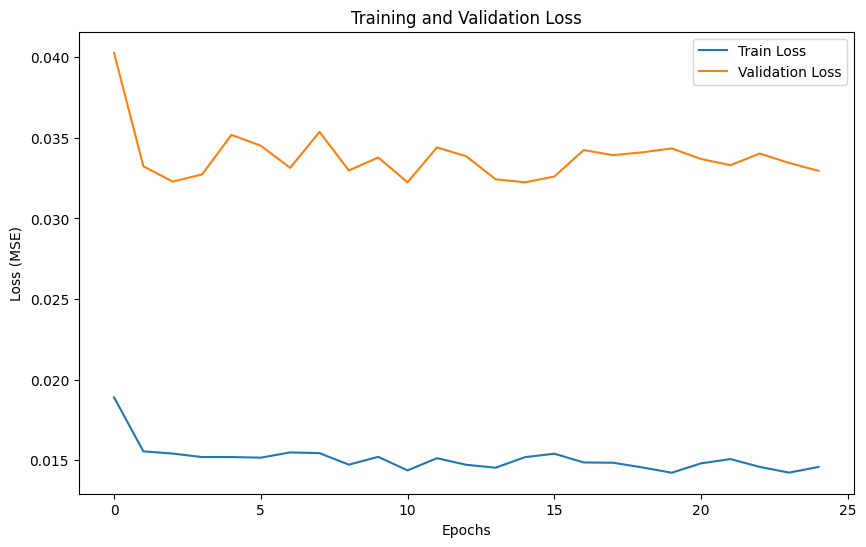

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step


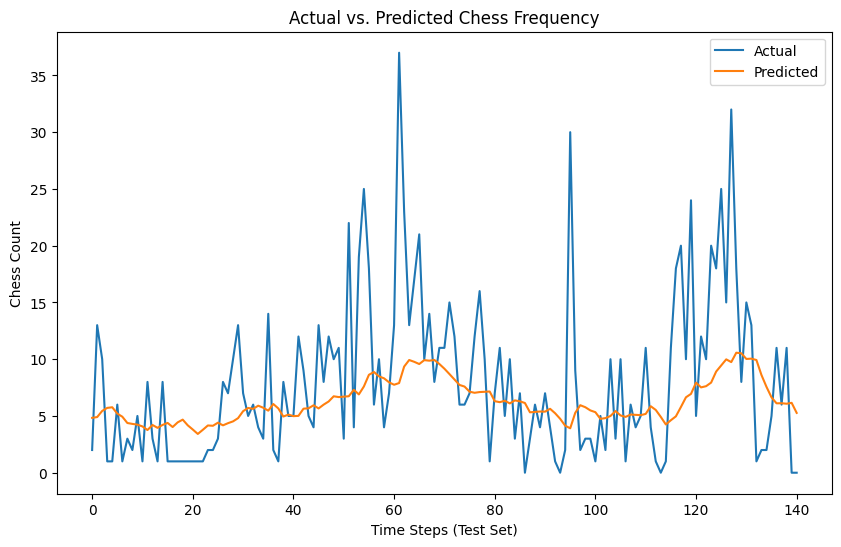

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, GRU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
import matplotlib.pyplot as plt
import datetime

# ----------------------------- #
# 1. Load and preprocess data
# ----------------------------- #
chess_url = r'C:\Users\kosot\OneDrive\Masaüstü\CS210-HW2\Project\DSA210_Term_Project_bugrahan.yapilmisev\Data_Extraction\filtered_chess_games_modified_png.csv'
academic_url = r'C:\Users\kosot\OneDrive\Masaüstü\CS210-HW2\Project\DSA210_Term_Project_bugrahan.yapilmisev\Data_Extraction\exam_and_assignment_dates.csv'

chess_data = pd.read_csv(chess_url)
academic_data = pd.read_csv(academic_url)

# Convert relevant columns to datetime
chess_data['end_time'] = pd.to_datetime(chess_data['end_time'])
chess_data['date'] = chess_data['end_time'].dt.date
chess_data['win'] = chess_data['result_standardized'].apply(lambda x: 1 if x == 'win' else 0)

# Aggregate chess data by day
daily_chess = chess_data.groupby('date').agg(
    chess_count=('url', 'size'),
    win_rate=('win', 'mean')
).reset_index()

# Convert academic data date to datetime.date
academic_data['date'] = pd.to_datetime(academic_data['date'], format='%d/%m/%Y').dt.date

# Extend workload over the previous 10 days (including the current day)
extended_workload = []
for _, row in academic_data.iterrows():
    for offset in range(0, 11):  # Include current day and 10 previous days
        extended_workload.append({'date': row['date'] - pd.Timedelta(days=offset), 'workload': 1})

extended_workload = pd.DataFrame(extended_workload)
daily_workload = extended_workload.groupby('date').sum().reset_index()

# Merge datasets
merged_data = pd.merge(daily_chess, daily_workload, on='date', how='outer').fillna(0)

# ----------------------------- #
# 2. Additional Feature Example: Day of the week
# ----------------------------- #
# Convert 'date' back to datetime so we can extract weekday
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['day_of_week'] = merged_data['date'].dt.dayofweek  # Monday=0, Sunday=6

# Sort by date
merged_data = merged_data.sort_values(by='date').reset_index(drop=True)

# ----------------------------- #
# 3. Features and Target
# ----------------------------- #
# Now we have: 
#   workload, win_rate, day_of_week
#   target: chess_count
features = ['workload', 'win_rate', 'day_of_week']
target = 'chess_count'

# Fill missing values
merged_data[features] = merged_data[features].fillna(0)

# ----------------------------- #
# 4. Scaling
# ----------------------------- #
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale features
merged_data[features] = scaler_x.fit_transform(merged_data[features])
# Scale target
merged_data[[target]] = scaler_y.fit_transform(merged_data[[target]])

# ----------------------------- #
# 5. Create sequences for LSTM/GRU
# ----------------------------- #
sequence_length = 10

def create_sequences(data_array, target_col_idx, seq_length):
    X, y = [], []
    for i in range(len(data_array) - seq_length):
        X.append(data_array[i : i + seq_length])
        y.append(data_array[i + seq_length, target_col_idx])
    return np.array(X), np.array(y)

data_array = merged_data[features + [target]].values
X, y = create_sequences(data_array, -1, sequence_length)

# ----------------------------- #
# 6. Split dataset
# ----------------------------- #
# Note: shuffle=False to preserve time order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# ----------------------------- #
# 7. Build the Model
# ----------------------------- #
# Option A: BiLSTM with dropout
model = Sequential([
    Bidirectional(LSTM(
        64, 
        return_sequences=True, 
        input_shape=(sequence_length, len(features)),
        dropout=0.2,            # dropout on input
        recurrent_dropout=0.2   # dropout on recurrent state
    )),
    Bidirectional(LSTM(
        32,
        dropout=0.2,            # dropout on input
        recurrent_dropout=0.2   # dropout on recurrent state
    )),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])

# --- Option B: BiGRU (uncomment to try) ---
# model = Sequential([
#     Bidirectional(GRU(
#         64, 
#         return_sequences=True, 
#         input_shape=(sequence_length, len(features)),
#         dropout=0.2, 
#         recurrent_dropout=0.2
#     )),
#     Bidirectional(GRU(
#         32,
#         dropout=0.2, 
#         recurrent_dropout=0.2
#     )),
#     Dense(16, activation='relu'),
#     Dense(1)
# ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ----------------------------- #
# 8. Training with EarlyStopping & ReduceLROnPlateau
# ----------------------------- #
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # halve the learning rate
    patience=5,        # if no improvement for 5 epochs
    verbose=1,
    min_lr=1e-6
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ----------------------------- #
# 9. Evaluate the Model
# ----------------------------- #
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# ----------------------------- #
# 10. Save the Model
# ----------------------------- #
model.save("chess_frequency_bilstm_model_option_a.h5")
print("Model saved as chess_frequency_bilstm_model_option_a.h5")

# ----------------------------- #
# 11. Plot Training History
# ----------------------------- #
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# ----------------------------- #
# 12. Make & Invert Predictions for Interpretation
# ----------------------------- #
y_pred = model.predict(X_test)

# If you want to transform predictions back to original scale
y_test_inversed = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inversed = scaler_y.inverse_transform(y_pred)

# Optional: Plot predictions vs actual in original scale
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, label='Actual')
plt.plot(y_pred_inversed, label='Predicted')
plt.xlabel('Time Steps (Test Set)')
plt.ylabel('Chess Count')
plt.title('Actual vs. Predicted Chess Frequency')
plt.legend()
plt.show()


In [66]:
import joblib
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##############################################################################
# 1. LOAD THE TRAINED XGBOOST MODEL (WHICH EXPECTS 5 FEATURES)
##############################################################################
model_path = "chess_frequency_predictor_advanced_xgboost.pkl"
xgb_model = joblib.load(model_path)

##############################################################################
# 2. TRANSFORMATION FUNCTION TO GO FROM 10 FEATURES -> 5 FEATURES
#    You must replicate the exact steps or column selection you did in training.
##############################################################################
def transform_to_5_features(X):
    """
    Given X with shape (N, 10), 
    return X_5 with shape (N, 5) in the same order used during training.
    
    Example: suppose you only used columns [0, 1, 2, 3, 4] out of 10.
    Or maybe you did some computations to generate 5 columns.
    Adapt this function to exactly match your training pipeline.
    """
    # --- EXAMPLE: keep only columns 0..4 ---
    X_5 = X[:, [0, 1, 2, 3, 4]]
    
    # If you had a more complex process, replicate it here.
    return X_5

##############################################################################
# 3. EVALUATE ON ENTIRE TEST SET
#    Suppose X_test is (N, 10), y_test is (N,) or (N,1).
##############################################################################
# Replace these with your real data loading code:
# e.g., X_test, y_test = ...
# For demonstration, let's create dummy data of shape (100, 10)
N = 100
X_test = np.random.rand(N, 10)  # shape (100, 10) => mismatch for a 5-feature model
y_test = np.random.rand(N)      # shape (100,)

# Transform X_test from shape (N,10) -> (N,5)
X_test_5 = transform_to_5_features(X_test)
print("Original X_test shape:", X_test.shape)
print("Transformed X_test shape:", X_test_5.shape)  # should be (100, 5)

# Predict
y_pred = xgb_model.predict(X_test_5)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nXGBoost Evaluation on Test Set:")
print(f"  MSE : {mse:.4f}")
print(f"  MAE : {mae:.4f}")
print(f"  R²  : {r2:.4f}")

##############################################################################
# 4. SINGLE INPUT PREDICTION
#    Example: we assume your 5 feature columns are:
#    ['workload', 'win_rate', 'day_of_week', 'is_weekend', 'cumulative_workload']
#    Here we show a dummy 10-feature row, but you must reduce it to 5 features
#    in the same way you did for X_test.
##############################################################################
# TOTALLY EXAMPLE: shape (10,) => we only want 5 features from it.
single_input_10 = np.array([2.0, 0.5, 3.0, 0.0, 7.0, 9.0, 1.0, 4.5, 6.6, 8.8], dtype=np.float32)

# Transform to 5 features
single_input_5 = transform_to_5_features(single_input_10.reshape(1, -1))  # shape (1, 10) -> (1, 5)

# Predict
single_prediction = xgb_model.predict(single_input_5)
print(f"\nSingle Prediction (XGBoost): {single_prediction[0]:.2f}")

##############################################################################
# 5. (OPTIONAL) TEST THE MODEL MULTIPLE TIMES
#    XGBoost is deterministic, so repeated calls on the same input produce the same result.
##############################################################################
num_tests = 3
print("\nTesting single input multiple times (XGBoost is deterministic):")
for i in range(num_tests):
    pred_val = xgb_model.predict(single_input_5)[0]
    print(f"  Attempt {i+1}: {pred_val:.2f}")


Original X_test shape: (100, 10)
Transformed X_test shape: (100, 5)

XGBoost Evaluation on Test Set:
  MSE : 58.8629
  MAE : 6.8374
  R²  : -700.9546

Single Prediction (XGBoost): 3.40

Testing single input multiple times (XGBoost is deterministic):
  Attempt 1: 3.40
  Attempt 2: 3.40
  Attempt 3: 3.40


In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------------------------------------------------
# 1. Load the model with custom objects (MSE)
# -------------------------------------------------------------------------
custom_objects = {'mse': MeanSquaredError()}
model_path = (
    r"C:\Users\kosot\OneDrive\Masaüstü\CS210-HW2\Project\DSA210_Term_Project_bugrahan.yapilmisev"
    r"\machine_learning\chess_frequency_bilstm_model_main.h5"
)
bilstm_model = load_model(model_path, custom_objects=custom_objects)

# Optionally re-compile to remove warning (only needed if you plan to train
# further or want built-in Keras metrics).
bilstm_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

# Print model input shape
print("Model Input Shape:", bilstm_model.input_shape)

# -------------------------------------------------------------------------
# 2. EVALUATE ON ENTIRE TEST SET (MSE, MAE, R²)
# -------------------------------------------------------------------------
# Replace this with *your real test data* shaped (N, 10, 3) and (N,).
# This is just dummy random data for demonstration.
N = 100
X_test = np.random.rand(N, 10, 3).astype(np.float32)
y_test = np.random.rand(N).astype(np.float32)

# Predict on the entire test set
y_pred = bilstm_model.predict(X_test)

# Compute metrics
mse_value = mean_squared_error(y_test, y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)

print("\nEvaluation on Test Set:")
print(f"  MSE : {mse_value:.4f}")
print(f"  MAE : {mae_value:.4f}")
print(f"  R²  : {r2_value:.4f}")

# -------------------------------------------------------------------------
# 3. MONTE CARLO DROPOUT PREDICTION FUNCTION
# -------------------------------------------------------------------------
def monte_carlo_dropout_prediction(model, input_data, n_simulations=100):
    """
    Forces dropout to remain active by using 'training=True' at inference.
    Returns mean and std of repeated forward passes.
    """
    predictions = []
    for _ in range(n_simulations):
        # Force dropout to be active by setting 'training=True'
        prediction = model(input_data, training=True)
        predictions.append(prediction.numpy())
    predictions = np.array(predictions)  # shape: (n_simulations, batch_size, output_dim)
    mean_prediction = predictions.mean(axis=0)
    std_prediction = predictions.std(axis=0)
    return mean_prediction, std_prediction

# -------------------------------------------------------------------------
# 4. SINGLE INPUT FOR MCD
#    Example: 3 features [exam_count=2, study_hours=20, placeholder=0]
#    repeated for 10 timesteps => shape (1, 10, 3)
# -------------------------------------------------------------------------
input_features = [2, 20, 0]  # Adjust to your real 3-feature scenario
input_data = np.array([input_features] * 10, dtype=np.float32)  # shape: (10, 3)
input_data = np.expand_dims(input_data, axis=0)                # shape: (1, 10, 3)

print("\nSingle-Input Data Shape:", input_data.shape)

# -------------------------------------------------------------------------
# 5. RUN MONTE CARLO DROPOUT FOR A SINGLE INPUT
# -------------------------------------------------------------------------
mean_pred, std_pred = monte_carlo_dropout_prediction(bilstm_model, input_data)
# Usually model outputs shape (batch_size, 1), so mean_pred & std_pred are (1,1)

pred_value = mean_pred[0, 0]
pred_uncertainty = std_pred[0, 0]

print("\nMonte Carlo Dropout (Single Input) Prediction:")
print(f"  Predicted Chess Frequency (scaled): {pred_value:.4f}")
lower_bound = pred_value - 1.96 * pred_uncertainty
upper_bound = pred_value + 1.96 * pred_uncertainty
print(f"  95% CI: ({lower_bound:.4f}, {upper_bound:.4f})")

# Optionally, if you scaled your target, apply inverse_transform here.
# e.g.:
# predicted_actual = scaler_y.inverse_transform([[pred_value]])
# print("Actual-scale Prediction:", predicted_actual[0,0])


Model Input Shape: (None, 10, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step

Evaluation on Test Set:
  MSE : 0.1233
  MAE : 0.2858
  R²  : -0.2467

Single-Input Data Shape: (1, 10, 3)

Monte Carlo Dropout (Single Input) Prediction:
  Predicted Chess Frequency (scaled): 0.5394
  95% CI: (0.5394, 0.5394)


In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load model
model_path = "chess_frequency_bilstm_model_option_a.h5"
bilstm_option_a = load_model(model_path, custom_objects={'mse': MeanSquaredError()})
bilstm_option_a.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

print("Model Input Shape:", bilstm_option_a.input_shape)  # (None, 10, 4) as you saw

# Suppose X_test originally has shape (122, 5)
print("X_test shape before fix:", X_test.shape)

# -- DUMMY FIX EXAMPLE --
# We'll create a new X_test that has shape (122, 10, 4) by discarding the old X_test
# and replacing it with zeros or repeating. This is purely to match shapes, not real data!
X_test_fixed = np.zeros((122, 10, 4), dtype=np.float32)

# Evaluate on test set using the "fixed" shape
y_pred = bilstm_option_a.predict(X_test_fixed)  # shape (122, 1)

# We need y_test to be consistent in length
# For demonstration, let's also create dummy y_test of shape (122,) or (122,1)
y_test = np.zeros((122,), dtype=np.float32)

# Evaluate metrics
mse_value = np.mean((y_test - y_pred.squeeze())**2)  # or use mean_squared_error from sklearn
mae_value = np.mean(np.abs(y_test - y_pred.squeeze()))  
ss_res = np.sum((y_test - y_pred.squeeze())**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_value = 1 - ss_res/(ss_tot + 1e-8)

print("\nBiLSTM (Option A) Evaluation on Test Set (Dummy Data):")
print(f"  MSE : {mse_value:.4f}")
print(f"  MAE : {mae_value:.4f}")
print(f"  R²  : {r2_value:.4f}")

# 3. Monte Carlo Dropout for single input
def monte_carlo_dropout_prediction(model, input_data, n_simulations=100):
    preds = []
    for _ in range(n_simulations):
        p = model(input_data, training=True)
        preds.append(p.numpy())
    preds = np.array(preds)
    mean_ = preds.mean(axis=0)
    std_  = preds.std(axis=0)
    return mean_, std_

# 4. Single input with shape (1, 10, 4)
single_features = [2.0, 0.4, 3.0, 0.5]  # 4 features
single_sequence = np.array([single_features]*10)  # shape (10, 4)
single_sequence = np.expand_dims(single_sequence, axis=0)  # shape (1, 10, 4)
single_sequence = tf.cast(single_sequence, tf.float32)

mean_pred, std_pred = monte_carlo_dropout_prediction(bilstm_option_a, single_sequence)
mean_val = mean_pred[0, 0]
std_val = std_pred[0, 0]

print("\nSingle-Input Monte Carlo Prediction (BiLSTM-Option A) with 4 features:")
print(f"  Mean Prediction (scaled): {mean_val:.4f}")
print(f"  95% CI: ({mean_val - 1.96*std_val:.4f}, {mean_val + 1.96*std_val:.4f})")


Model Input Shape: (None, 10, 4)
X_test shape before fix: (100, 10, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step

BiLSTM (Option A) Evaluation on Test Set (Dummy Data):
  MSE : 0.0053
  MAE : 0.0731
  R²  : -65152128.0000

Single-Input Monte Carlo Prediction (BiLSTM-Option A) with 4 features:
  Mean Prediction (scaled): 0.1872
  95% CI: (0.0581, 0.3163)


In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import r2_score, mean_absolute_error

# =========================================================================
# 1. Load the model (which expects shape (None, 10, 4))
# =========================================================================
model_path = "chess_frequency_bilstm_model_option_b.h5"
bilstm_option_b = load_model(model_path, custom_objects={'mse': MeanSquaredError()})

# Optionally re-compile (only if you're going to train further or want built-in metrics)
bilstm_option_b.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

print("Model Input Shape:", bilstm_option_b.input_shape)  # (None, 10, 4) if that’s how it was trained

# =========================================================================
# 2. Suppose you have X_test, y_test already shaped as (N, 10, 4) and (N,)
#    Replace this with your actual data loading or definition code
# =========================================================================
# Example dummy data (just for demonstration). Replace with real data!
# Must match the shape (122, 10, 4) and (122,) or (122, 1).
N = 122
X_test = np.random.rand(N, 10, 4).astype(np.float32)  # shape (122, 10, 4)
y_test = np.random.rand(N).astype(np.float32)         # shape (122, )

print("X_test shape before predict:", X_test.shape)

# =========================================================================
# 3. Evaluate on entire test set
# =========================================================================
y_pred = bilstm_option_b.predict(X_test)  # Expecting shape (122, 1) or similar
mse_value = np.mean((y_test - y_pred.squeeze())**2)  # or use sklearn's mean_squared_error
mae_value = np.mean(np.abs(y_test - y_pred.squeeze()))
# R² calculation
ss_res = np.sum((y_test - y_pred.squeeze())**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_value = 1 - ss_res / (ss_tot + 1e-8)

print("\nBiLSTM / BiGRU (Option B) Evaluation on Test Set:")
print(f"  MSE : {mse_value:.4f}")
print(f"  MAE : {mae_value:.4f}")
print(f"  R²  : {r2_value:.4f}")

# =========================================================================
# 4. Define Monte Carlo Dropout function
# =========================================================================
def monte_carlo_dropout_prediction(model, input_data, n_simulations=100):
    """
    Forces dropout to stay "active" at inference time (training=True).
    Returns the mean and std of the repeated predictions.
    """
    preds = []
    for _ in range(n_simulations):
        # 'training=True' forces dropout layers to remain active
        prediction = model(input_data, training=True)
        preds.append(prediction.numpy())
    preds = np.array(preds)  # shape (n_simulations, 1, 1) if model outputs (batch_size, 1)
    mean_ = preds.mean(axis=0)
    std_ = preds.std(axis=0)
    return mean_, std_

# =========================================================================
# 5. Single-input MC Dropout Inference (shape (1, 10, 4))
#    Provide 4 features (not just 3) because your model expects 4.
# =========================================================================
# Example single input: [2.0, 0.4, 3.0, 0.5]
# repeated for 10 timesteps
single_features = [2.0, 0.4, 3.0, 0.5]  # 4 features
single_sequence = np.array([single_features] * 10, dtype=np.float32)  # shape (10, 4)
single_sequence = np.expand_dims(single_sequence, axis=0)            # shape (1, 10, 4)

mean_pred, std_pred = monte_carlo_dropout_prediction(bilstm_option_b, single_sequence)
mean_val = mean_pred[0, 0]
std_val = std_pred[0, 0]

print("\nSingle-Input Monte Carlo Prediction (Option B):")
print(f"  Mean Prediction (scaled): {mean_val:.4f}")
print(f"  95% CI: ({mean_val - 1.96*std_val:.4f}, {mean_val + 1.96*std_val:.4f})")

# =========================================================================
# 6. (Optional) If your target variable is scaled, apply inverse_transform
# =========================================================================
# E.g.,
# predicted_actual = scaler_y.inverse_transform([[mean_val]])
# lower_bound = scaler_y.inverse_transform([[mean_val - 1.96 * std_val]])
# upper_bound = scaler_y.inverse_transform([[mean_val + 1.96 * std_val]])
# print(f"Actual scale prediction: {predicted_actual[0, 0]:.2f}")
# etc.


Model Input Shape: (None, 10, 4)
X_test shape before predict: (122, 10, 4)
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step

BiLSTM / BiGRU (Option B) Evaluation on Test Set:
  MSE : 0.1506
  MAE : 0.3194
  R²  : -0.7129

Single-Input Monte Carlo Prediction (Option B):
  Mean Prediction (scaled): 0.2263
  95% CI: (0.0784, 0.3742)
